**Assignment-4**

**1. Download the dataset: Dataset- Mall_Customers.csv**

**2. Load the dataset into the tool**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"/Mall_Customers.csv")

In [5]:
df.shape

(200, 5)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Perform Visualizations**



*   **Univariate** **Analysis**




In [7]:
print('This dataset has {} obseravtions with {} features'.format(df.shape[0], df.shape[1]))

This dataset has 200 obseravtions with 5 features


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Obseravtions**


> No missing values in the dataset


> All are numerical features except for feature 'Gender'


> Each feature had different scale range







In [10]:
# Finding the number of males and females in the data
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

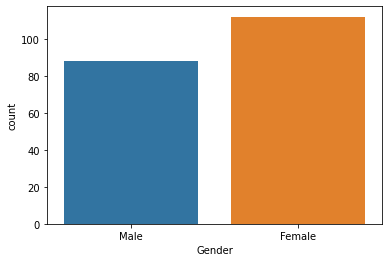

In [11]:
#Visualizing the number of males and females in the dataset
sns.countplot(x="Gender",data=df,palette="tab10")
plt.show()

**Observation**


> The number of female customers is more than the number of male customers. 



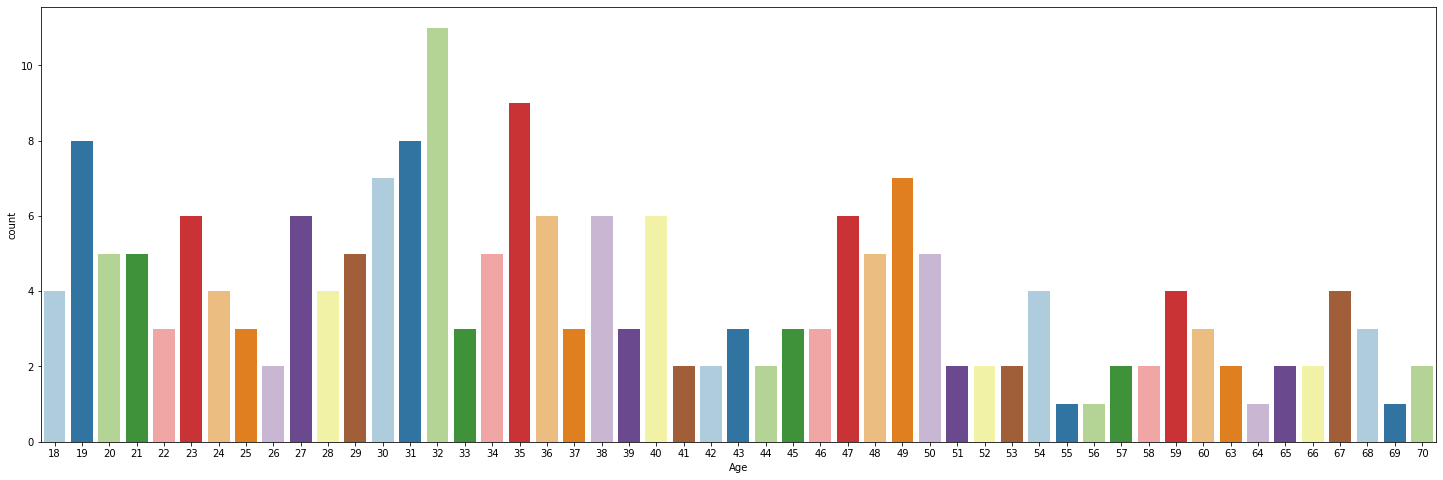

In [12]:
#Visualizing the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df,palette = "Paired")
plt.show()

In [14]:
#Computing minimum and maximum age of customers
print(min(df.Age))
print(max(df.Age))

18
70


**Observation**

> Customers with the age = 32 make up for the most customers



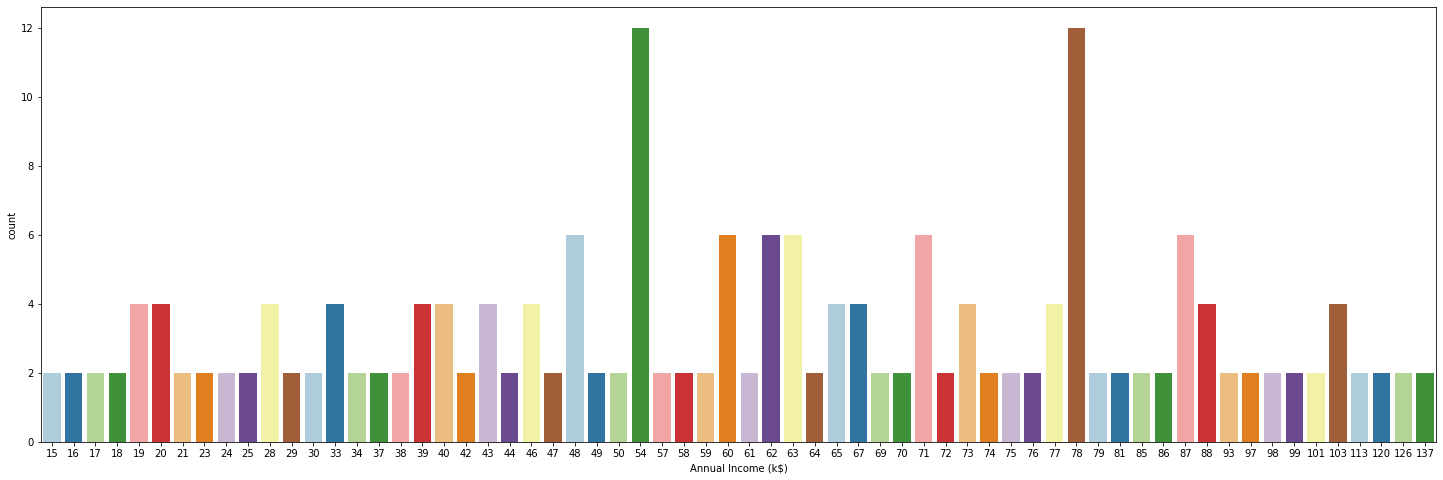

In [20]:
#Visualizing the Income distribution of customers
plt.figure(figsize=(25,8))

sns.countplot(x="Annual Income (k$)",data=df, palette = "Paired")

**Observation**


> Customers with annual income of 54k and 78k make the largest number of customers



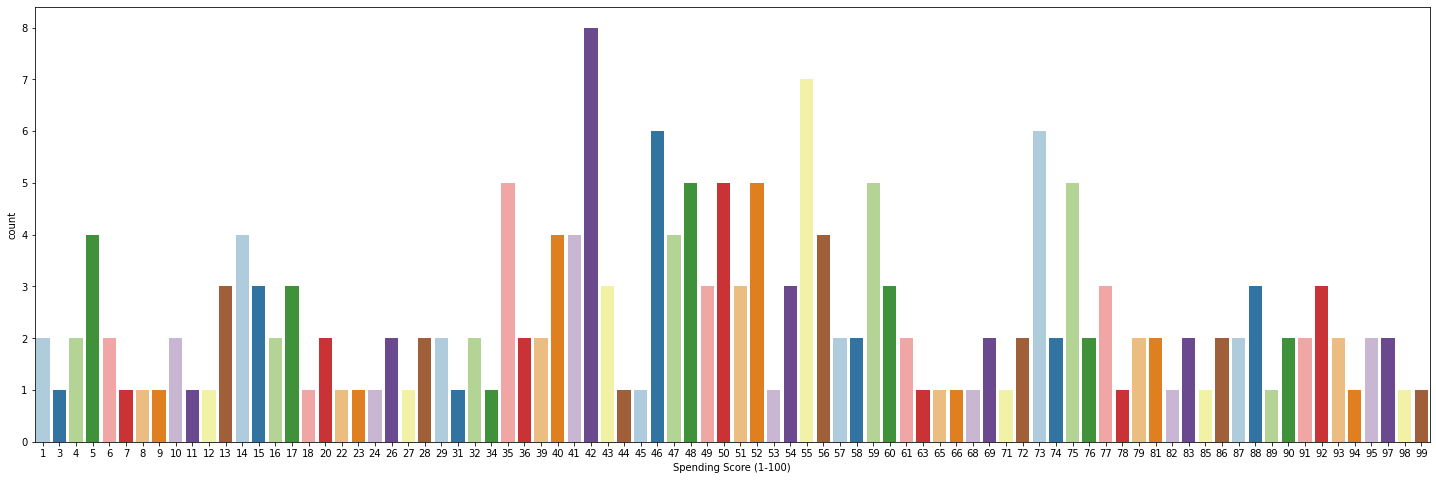

In [23]:
#Visualizing the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df, palette = "Paired")
plt.show()

**Obseravtion**


> The maximum spending score is followed by 55.





*   **Bi-Variate Analysis**



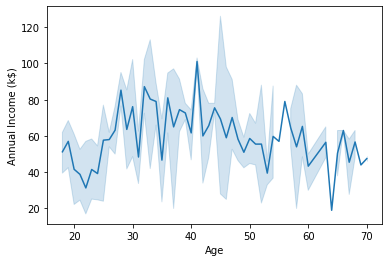

In [28]:
sns.lineplot(x = df["Age"],y = df["Annual Income (k$)"], palette = "bright")

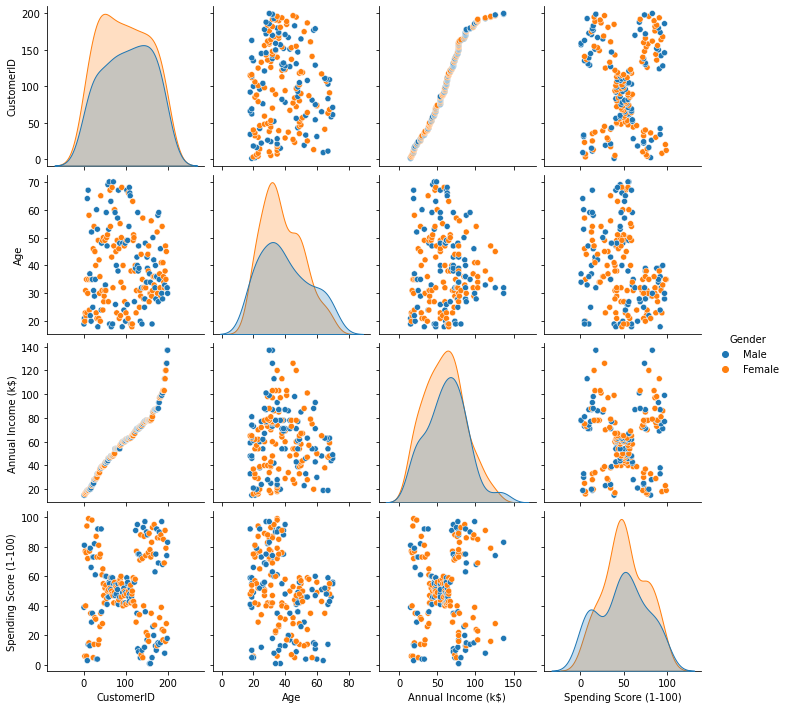

In [30]:
sns.pairplot(df,hue="Gender",diag_kind='kde')
plt.show()



*   **Multi-Variate Analysis**




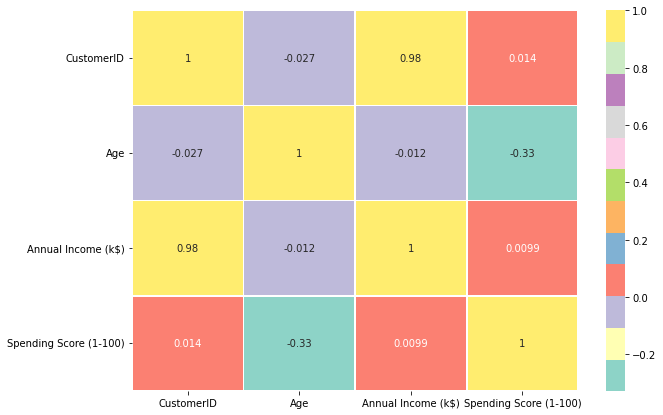

In [31]:
#Finding correlation between all the parameters in the dataset
lw = 0.8
lc = "white"

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,linewidth = lw, linecolor = lc,cmap = "Set3")

**4. Perform descriptive statistics on the dataset**

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.groupby('Gender')[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']].mean().sort_values('Age')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [39]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [41]:
df.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

**5. Check for Missing values and deal with them**

In [42]:
#Missing values in the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)

In [43]:
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Observation**


> No missing values



**6. Find the outliers and replace the outlier**

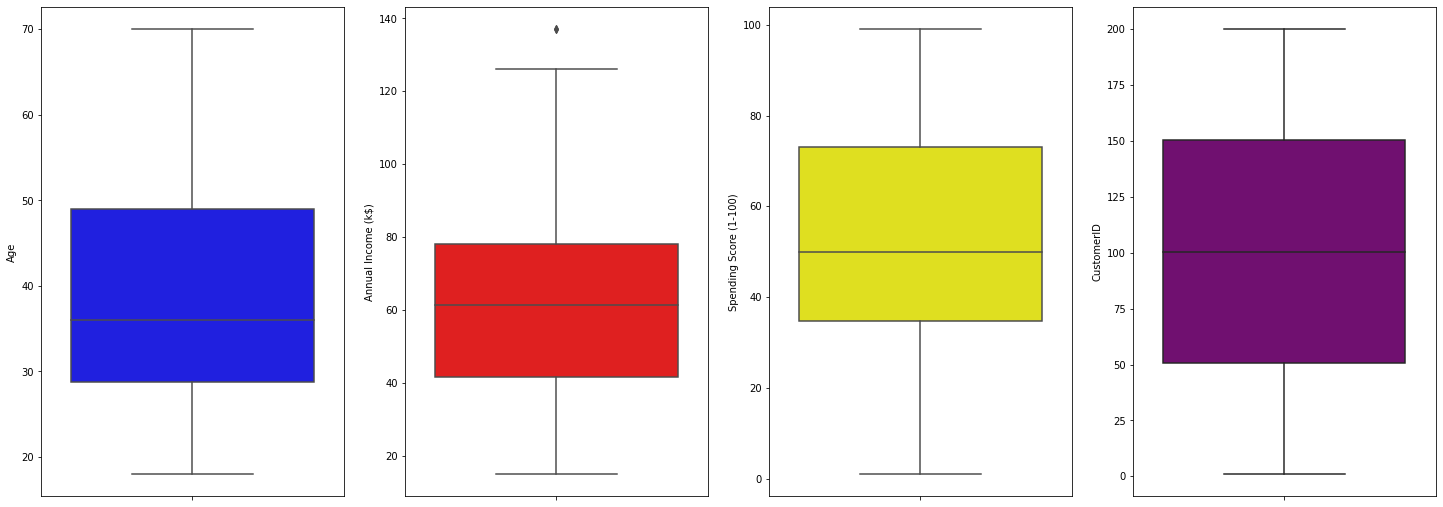

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols = 4, figsize = (25,9))
sns.boxplot(ax = ax1, y = 'Age', data=df, color="Blue")
sns.boxplot(ax = ax2, y = 'Annual Income (k$)', data=df, color="Red")
sns.boxplot(ax = ax3, y = 'Spending Score (1-100)', data=df, color="Yellow")
sns.boxplot(ax = ax4, y = 'CustomerID', data=df, color="Purple")




**Observation**


> No outlier that requires to be replaced




**7.Check for Categorical columns and perform encoding**

In [48]:
#Numerical and Categorical features
numerical_features = df.select_dtypes(include = [np.number]).columns 
categorical_features = df.select_dtypes(include = [np.object]).columns

In [49]:
categorical_features

Index(['Gender'], dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [52]:
#Transform data
df['Gender'] = encoder.fit_transform(df['Gender'])

In [53]:
df.head(6).T

,0,1,2,3,4,5
CustomerID,1,2,3,4,5,6
Gender,1,1,0,0,0,0
Age,19,21,20,23,31,22
Annual Income (k$),15,15,16,16,17,17
Spending Score (1-100),39,81,6,77,40,76


**Observation**


>Male encoded to 1,Female encoded to 0



**8. Scale the data**

In [55]:
x = df.iloc[:,3:5]
y = df["Spending Score (1-100)"]

In [57]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)



In [60]:
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

**9. Perform any of the clustering algorithms**

In [62]:
from sklearn.cluster import KMeans

In [63]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

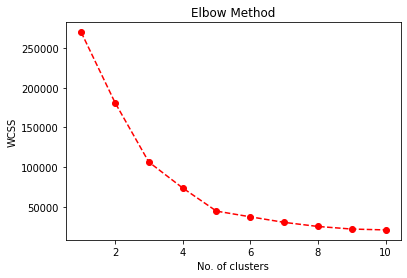

In [65]:
#Visualization elbow method
k =list(range(1,11))
plt.plot(k,wcss,'ro--')
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [66]:
#Creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0) 

In [69]:
#To cluster the data into its respective cluster from 0 to 4
y_means=kmeans.fit_predict(x)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

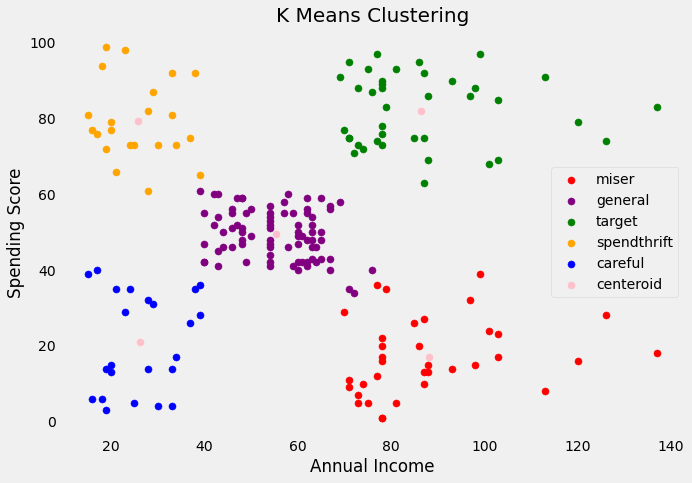

In [75]:
plt.figure(figsize=(10,7))
x = np.array(x)
plt.scatter(x[y_means == 0, 0],x[y_means == 0,1], s = 50, c='red',label = "miser")
plt.scatter(x[y_means == 1, 0],x[y_means == 1,1], s = 50, c='purple',label = "general")
plt.scatter(x[y_means == 2, 0],x[y_means == 2,1], s = 50, c='green',label = "target")
plt.scatter(x[y_means == 3, 0],x[y_means == 3,1], s = 50, c='orange',label = "spendthrift")
plt.scatter(x[y_means == 4, 0],x[y_means == 4,1], s = 50, c='blue',label = "careful")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c='pink',label = "centeroid")

plt.style.use('fivethirtyeight')
plt.title("K Means Clustering", fontsize = 20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid()
plt.show()

**Observation**

> Cluster 0(miser) contains customers with high annual income but low spending score.


> Cluster 1(general) contains customers with haverage annual income and average spending score.


> Cluster 2(target) contains customers with high annual income and high spending score.


> Cluster 3(spendthrift) contains customers with low annual income but high spending score.


> Cluster 4(careful) contains customers with low annual income and low spending score.











**10. Add the cluster data with the primary dataset**

In [76]:
c1 = pd.Series(y_means)

In [77]:
df['Cluster'] = c1

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [81]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0
199,200,1,30,137,83,2


**11. Split the data into Dependent and Independent Variables**

In [82]:
dm = pd.get_dummies(df,columns = ["Gender"])

In [83]:
dm.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
0,1,19,15,39,4,0,1
1,2,21,15,81,3,0,1
2,3,20,16,6,4,1,0
3,4,23,16,77,3,1,0
4,5,31,17,40,4,1,0


In [85]:
y = dm["Age"]

In [86]:
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [87]:
x = dm.drop(columns = "Age",axis = 1)

In [88]:
x.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
0,1,15,39,4,0,1
1,2,15,81,3,0,1
2,3,16,6,4,1,0
3,4,16,77,3,1,0
4,5,17,40,4,1,0


**12. Split the data into training and testing**

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 0)

In [92]:
x_train.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
131,132,71,75,2,0,1
96,97,60,47,1,1,0
181,182,97,86,2,1,0
19,20,23,98,3,1,0
153,154,78,76,2,1,0


In [93]:
y_train.head()

131    39
96     47
181    32
19     35
153    38
Name: Age, dtype: int64

In [94]:
x_test.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
18,19,23,29,4,0,1
170,171,87,13,0,0,1
107,108,63,46,1,0,1
98,99,61,42,1,0,1
177,178,88,69,2,0,1


In [95]:
y_test.head()

18     52
170    40
107    54
98     48
177    27
Name: Age, dtype: int64

**13. Build the model**

**14. Train**

**15. Test the model**

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(x_train,y_train)
knn.fit(x_test,y_test)

KNeighborsRegressor(n_neighbors=4)

In [98]:
#Testing the model
knn_test_pred = knn.predict(x_test)

In [99]:
knn_test_pred

array([47.5 , 42.25, 39.5 , 48.75, 30.25, 39.75, 23.5 , 47.75, 55.5 ,
       47.5 , 46.5 , 37.  , 40.  , 43.5 , 47.  , 23.25, 23.75, 33.25,
       35.5 , 47.25, 32.5 , 33.25, 43.75, 30.75, 48.5 , 35.  , 32.5 ,
       32.5 , 32.25, 51.5 , 40.75, 40.  , 45.5 , 39.5 , 54.5 , 32.5 ,
       37.  , 40.75, 47.  , 39.5 , 39.25, 44.75, 49.25, 47.5 , 42.25,
       46.5 , 55.5 , 46.25, 35.75, 33.  , 48.75, 35.  , 40.  , 48.75,
       31.  , 54.5 , 54.5 , 46.  , 51.5 , 46.75])

In [123]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.fit(x_test,y_test)

DecisionTreeRegressor()

In [125]:
#Testing the model
dt_test_pred = dt.predict(x_test)

In [126]:
dt_test_pred

array([52., 40., 54., 48., 27., 46., 22., 48., 58., 44., 19., 31., 37.,
       47., 57., 23., 18., 47., 30., 59., 29., 28., 24., 30., 70., 39.,
       35., 30., 40., 49., 35., 47., 43., 19., 46., 36., 38., 31., 46.,
       66., 20., 43., 45., 19., 36., 54., 64., 26., 51., 32., 47., 23.,
       41., 27., 34., 54., 60., 56., 65., 51.])

**16. Measuring the performance using the metrics**

In [129]:
#Measuring the Performance
kacc=r2_score(y_test,knn_test_pred)
print('Score of testing Set: %2f' %kacc)

Score of testing Set: 0.352219


In [130]:
#Measuring the Performance
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f' %dacc)

Mean Squared Error of testing Set: 0.000000
